In [128]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [14]:
# Load MNIST data
dTrain = pd.read_csv("../../DataSet/mnist_train.csv", encoding="UTF-8")
dTest = pd.read_csv("../../DataSet/mnist_test.csv", encoding="UTF-8")

In [15]:
print(dTrain.shape, dTest.shape)

(60000, 785) (10000, 785)


In [16]:
dTrain.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Number of Input Features in the image: ", d.shape[1])

In [135]:
# input and output features
Xtrain = dTrain.iloc[:,1:].to_numpy() / 255.0
Ytrain = dTrain.iloc[:,0].to_numpy()
Xtest = dTest.iloc[:,1:].to_numpy() / 255.0
Ytest = dTest.iloc[:,0].to_numpy()

In [93]:
def onehotencode(y,k):
    Y = np.zeros((y.shape[0],k))
    for i,val in enumerate(y):
        Y[i,val.astype(np.int)] = 1
    return Y

In [37]:
def showPic(x,y):
    x = x.reshape(28,28)
    plt.title("Digit: "+str(y))
    plt.imshow(x)

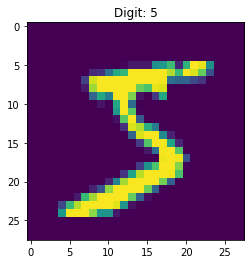

In [38]:
# testing pic
photo = 0
showPic(Xtrain[photo],Ytrain[photo])

In [136]:
pca = PCA(n_components=300)
pca.fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

In [68]:
def softmax(z):
    return np.exp(z) / np.exp(z).sum(axis=1, keepdims=True)

In [72]:
def cost(y,yhat):
    return -np.mean(y*np.log(yhat))

In [106]:
def predict(y):
    return np.argmax(y, axis=1)

In [103]:
def accuracy(y,yhat):
    return np.mean(y==yhat)

In [97]:
def fit(X,Y,Xtest,Ytest,lr,iterations):
    N = X.shape[0]
    D = X.shape[1]
    K = 10 # 0-9 digits
    Ctrain, Ctest = [],[] # cost
    
    T = onehotencode(Y,K)
    Ttest = onehotencode(Ytest,K)

    W = np.random.randn(D,K)
    b = np.random.randn(K)
    
    for i in range(iterations):
        Z = softmax(np.dot(X,W)+b)
        error = T-Z
        gradient = error
        W += lr*np.dot(X.T,gradient)
        b += lr*np.sum(gradient, axis=0)
        
        Yhat = softmax(np.dot(Xtest,W)+b)
        
        Ctrain.append(cost(T,Z))
        Ctest.append(cost(Ttest,Yhat))
        
    return Ctrain, Ctest, W, b, Z, Yhat

In [137]:
# Hyperparameters
iterations = 1000
lr = 1e-5

ctrain, ctest, W, B, y, yhat = fit(Xtrain, Ytrain, Xtest, Ytest, lr, iterations)
print("Training Accuracy without PCA: {}%".format(np.round(accuracy(Ytrain,predict(y))*100), decimals=2))
print("Testing Accuracy without PCA: {}%".format(np.round(accuracy(Ytest,predict(yhat))*100, decimals=2)))

ctrain_pca, ctest_pca, W, B, y, yhat = fit(Xtrain_pca, Ytrain, Xtest_pca, Ytest, lr, iterations)
print("Training Accuracy with PCA: {}%".format(np.round(accuracy(Ytrain,predict(y))*100), decimals=2))
print("Testing Accuracy with PCA: {}%".format(np.round(accuracy(Ytest,predict(yhat))*100, decimals=2)))

Training Accuracy without PCA: 88.0%
Testing Accuracy without PCA: 88.63%
Training Accuracy with PCA: 88.0%
Testing Accuracy with PCA: 88.44%


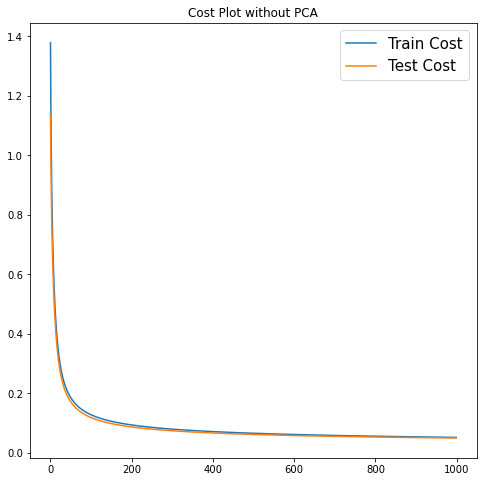

In [138]:
size = 8
plt.figure(figsize=(size,size))
plt.plot(ctrain, label="Train Cost")
plt.plot(ctest, label="Test Cost")
plt.legend(fontsize=15)
plt.title("Cost Plot without PCA")
plt.show()

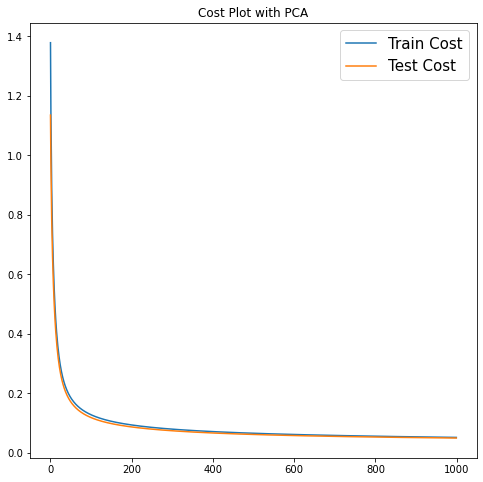

In [139]:
size = 8
plt.figure(figsize=(size,size))
plt.plot(ctrain, label="Train Cost")
plt.plot(ctest, label="Test Cost")
plt.legend(fontsize=15)
plt.title("Cost Plot with PCA")
plt.show()

## Almost Same Results can be achieved through minimizing Dimensionality of the data using PCA